# Regression Week 4: Ridge Regression (interpretation)

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a pre-built implementation of regression (Turi Create) to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression (Turi Create) to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from previous notebooks.  (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

# Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,1924059029,20140617T000000,4668000.0,5.0,6.75,9640.0,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270.0,10454.0
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890.0,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540.0,42730.0
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040.0,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930.0,25449.0
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050.0,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940.0,8800.0


# Polynomial function

In [3]:
def polynomial(data_frame, feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_df = data_frame[feature]
    poly_df.columns = ['power_1']

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_df[name] = poly_df[['power_1']].apply(lambda x : x**power)

    return poly_df

In [4]:
print(polynomial(sales, ['sqft_living'], 3))

       power_1      power_2       power_3
19452    290.0      84100.0  2.438900e+07
15381    370.0     136900.0  5.065300e+07
860      380.0     144400.0  5.487200e+07
18379    384.0     147456.0  5.662310e+07
4868     390.0     152100.0  5.931900e+07
...        ...          ...           ...
8092    9640.0   92929600.0  8.958413e+11
9254    9890.0   97812100.0  9.673617e+11
3914   10040.0  100801600.0  1.012048e+12
7252   12050.0  145202500.0  1.749690e+12
12777  13540.0  183331600.0  2.482310e+12

[21613 rows x 3 columns]


C:\Users\yc1033514\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


# Polynomial Regression using Ridge

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [6]:
y = sales['price'].to_numpy()
X = sales['sqft_living'].to_numpy().reshape(-1,1)

In [7]:
polynomial_features15 = PolynomialFeatures(degree=15)
X15 = polynomial_features15.fit_transform(X)

* Small Alpha

In [9]:
small_alpha = 1.5e-5

model1 = Ridge(alpha=small_alpha, normalize=True).fit(X15, y)
print("Model Intercept: {}".format(model1.intercept_))
print("Model Coefficient: {}".format(model1.coef_))

Model Intercept: 220664.37505527982
Model Coefficient: [ 0.00000000e+00  1.24873306e+02 -4.77376011e-02  3.01446238e-05
 -2.44419942e-09 -1.94153675e-13  8.54085685e-18  1.51142121e-21
  8.27979094e-26  6.52603100e-31 -3.27895017e-34 -3.87962315e-38
 -2.72437650e-42 -1.07790800e-46  3.78242694e-51  1.39790296e-54]


In [10]:
y_pred1 = model1.predict(X15)
print("mean sqaured error: {}".format(mean_squared_error(y, y_pred1)))
print("R2: {}".format(r2_score(y, y_pred1)))

mean sqaured error: 60463730459.922005
R2: 0.5513766052249449


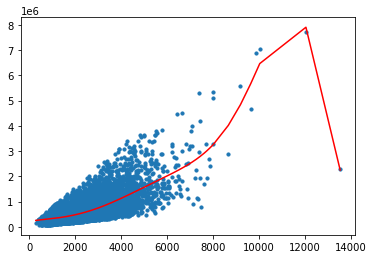

In [11]:
plt.scatter(X, y, s=10)
plt.plot(X, y_pred1, 'r')
plt.show()

* Middle Alpha

In [15]:
middle_alpha = 0.1

model2 = Ridge(alpha=middle_alpha, normalize=True).fit(X15, y)
print("Model Intercept: {}".format(model2.intercept_))
print("Model Coefficient: {}".format(model2.coef_))

Model Intercept: 188956.4264026372
Model Coefficient: [ 0.00000000e+00  1.06661592e+02  1.85790754e-02  1.85356948e-06
  8.45123764e-11  2.40786633e-15  5.11520052e-20 -8.68811782e-25
 -3.44876880e-28 -4.65182591e-32 -4.98626117e-36 -4.76289753e-40
 -4.23742143e-44 -3.59517415e-48 -2.95103474e-52 -2.36552013e-56]


In [13]:
y_pred2 = model2.predict(X15)
print("mean sqaured error: {}".format(mean_squared_error(y, y_pred2)))
print("R2: {}".format(r2_score(y, y_pred2)))

mean sqaured error: 61308827592.00634
R2: 0.5451062288947639


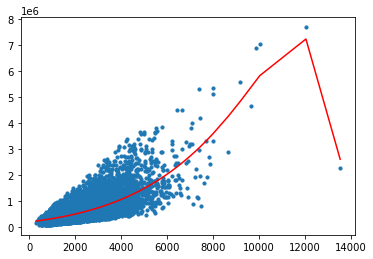

In [14]:
plt.scatter(X, y, s=10)
plt.plot(X, y_pred2, 'r')
plt.show()

* Large Alhpa

In [16]:
large_alpha = 1.23e2

model3 = Ridge(alpha=large_alpha, normalize=True).fit(X15, y)
print("Model Intercept: {}".format(model3.intercept_))
print("Model Coefficient: {}".format(model3.coef_))

Model Intercept: 532392.4372130121
Model Coefficient: [0.00000000e+00 2.22466078e+00 3.90024318e-04 4.92858347e-08
 3.59395123e-12 2.00286988e-16 1.09038352e-20 6.21752310e-25
 3.72063768e-29 2.31057472e-33 1.47411327e-37 9.59327265e-42
 6.33833882e-46 4.23820578e-50 2.86181261e-54 1.94841803e-58]


In [17]:
y_pred3 = model3.predict(X15)
print("mean sqaured error: {}".format(mean_squared_error(y, y_pred3)))
print("R2: {}".format(r2_score(y, y_pred3)))

mean sqaured error: 131095617245.53833
R2: 0.027308430997187605


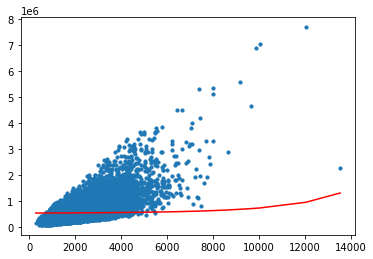

In [18]:
plt.scatter(X, y, s=10)
plt.plot(X, y_pred3, 'r')
plt.show()

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

In [19]:
from sklearn.model_selection import cross_validate
# https://scikit-learn.org/stable/modules/cross_validation.html

In [22]:
cv_results3 = cross_validate(model3, X, y, cv=5)
print("Test Score: {}".format(cv_results3['test_score']))
print("Mean Test Score: {}".format(cv_results3['test_score'].mean()))

Test Score: [-3.94170226 -1.27590867 -0.34058887 -0.0234658  -0.78442704]
Mean Test Score: -1.2732185286559141


In [25]:
error = []

for alphaVal in np.logspace(1, 7, num=13):
    model = Ridge(alpha=alphaVal, normalize=True).fit(X15, y)
    cv_results = cross_validate(model, X, y, cv=10)
    error.append(cv_results['test_score'].mean())

error

[-0.8926807951419586,
 -1.0560376723904101,
 -1.1156241270419225,
 -1.1353687200436324,
 -1.1417065627456253,
 -1.1437202977830516,
 -1.1443580541274432,
 -1.1445598262626404,
 -1.1446236418054272,
 -1.1446438230112128,
 -1.1446502049647633,
 -1.1446522231252707,
 -1.1446528613246187]

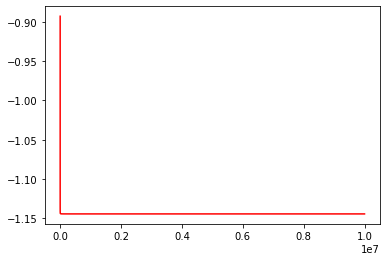

In [26]:
plt.plot(np.logspace(1, 7, num=13), error, 'r')
plt.show()